<a href="https://colab.research.google.com/github/noircir/TensorFlow-Examples/blob/master/MNIST_digits_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 4-dimensional array (6000, 28, 28, 1): 
# 60000 samples
# 28 x 28 pixels

# For labels we'll use one-hot encoding, instead of "1", "2", "3", ...
# So the output will be a 2D array of (60000, 10)

## MNIST from Keras datasets

In [0]:
import tensorflow as tf

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
from keras.datasets import mnist

In [33]:
(x_train,y_train) , (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [34]:
# no color channel for now
x_train.shape 

(60000, 28, 28)

In [0]:
single_image = x_train[0]

In [36]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

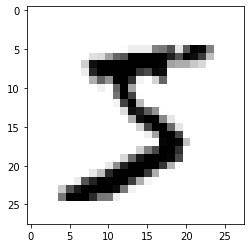

In [39]:
plt.imshow(single_image, cmap='gray_r') # '_r' means reversed negatives

In [40]:
# Now look at the actual labels
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## One-hot encoding for labels

In [42]:
# we need to translate it into one-hot encoding
y_train.shape

(60000,)

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
y_categorical_test = to_categorical(y_test, 10)
y_categorical_train = to_categorical(y_train, 10)

In [46]:
y_categorical_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
y_categorical_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [48]:
y_categorical_train[0]  # the same '5'

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Normalisation

In [49]:
single_image.max()

255

In [0]:
x_train = x_train / x_train.max() # /255

In [0]:
x_test = x_test / x_test.max()

In [0]:
scaled_image = x_train[0]

In [53]:
scaled_image.max()

1.0

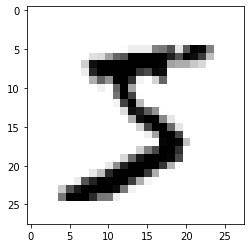

In [55]:
# still the same image
plt.imshow(scaled_image, cmap='gray_r')

In [56]:
x_train.shape

(60000, 28, 28)

## Include color channels by reshaping

In [0]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [59]:
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


## Model for CNN

In [0]:
model = tf.keras.models.Sequential()

In [63]:
# CONVOLUTIONAL LAYER
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
# POOLING LAYER
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
# FLATTEN 2d --> 1d
model.add(tf.keras.layers.Flatten())

# DENSE LAYER
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.fit(x_train,y_categorical_train,epochs=2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 34s 565us/sample - loss: 0.1360 - acc: 0.9588
Epoch 2/2
60000/60000 [==============================] - 33s 555us/sample - loss: 0.0491 - acc: 0.9850


## See how the model performs on the test set

In [67]:
model.metrics_names

['loss', 'acc']

In [68]:
model.evaluate(x_test, y_categorical_test)

10000/10000 [==============================] - 2s 155us/sample - loss: 0.0408 - acc: 0.9862


[0.04077270833605435, 0.9862]

In [0]:
# Pretty close to training metrics

In [0]:
from sklearn.metrics import classification_report

In [0]:
predictions = model.predict_classes(x_test)

In [72]:
y_categorical_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [74]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [75]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       1.00      0.97      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [0]:
# pretty good accuracy for CNN classifying the handwritten digits